In [1]:
# Imports
import numpy as np
from matplotlib import pyplot as plt

from scipy import signal

!wget https://www.cs.cmu.edu/~deva/pics/breakfeast.jpg


--2024-02-13 00:37:21--  https://www.cs.cmu.edu/~deva/pics/breakfeast.jpg
Resolving www.cs.cmu.edu (www.cs.cmu.edu)... 128.2.42.95
Connecting to www.cs.cmu.edu (www.cs.cmu.edu)|128.2.42.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50115 (49K) [image/jpeg]
Saving to: ‘breakfeast.jpg’

breakfeast.jpg      100%[===================>]  48.94K  --.-KB/s    in 0.1s    

2024-02-13 00:37:22 (333 KB/s) - ‘breakfeast.jpg’ saved [50115/50115]



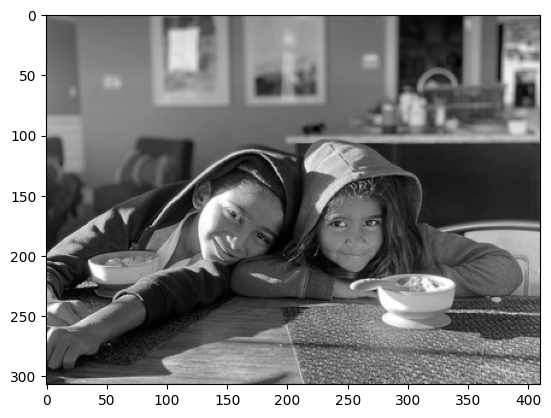

In [2]:
im = plt.imread('breakfeast.jpg')
im = np.mean(im,2)
plt.figure()
plt.imshow(im,cmap = 'gray') #plt.axis('off');


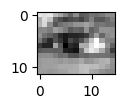

In [3]:
template = im[168:180,235:250];
plt.figure(figsize=(1,1))
#plt.subplot(212)
plt.imshow(template,cmap = 'gray')

# Also crop source image to simplify matching
im = im[150:225,200:300];

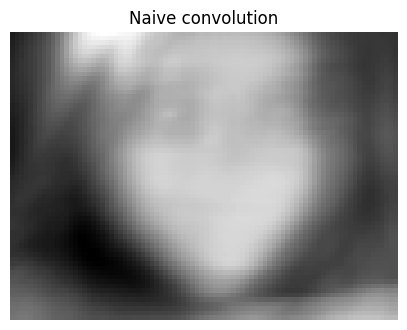

In [8]:
# Match filtering
f = template;
f = f[::-1,::-1]
res = signal.convolve2d(im,f,mode='valid');
plt.figure(figsize=(5,5))
plt.imshow(res, cmap = 'gray'); plt.title('Naive convolution'); plt.axis('off'); plt.imshow(res, cmap = 'gray'); plt.title('Naive convolution'); plt.axis('off'); plt.axis('off'); plt.imshow(res, cmap = 'gray'); plt.title('Naive convolution'); plt.axis('off');

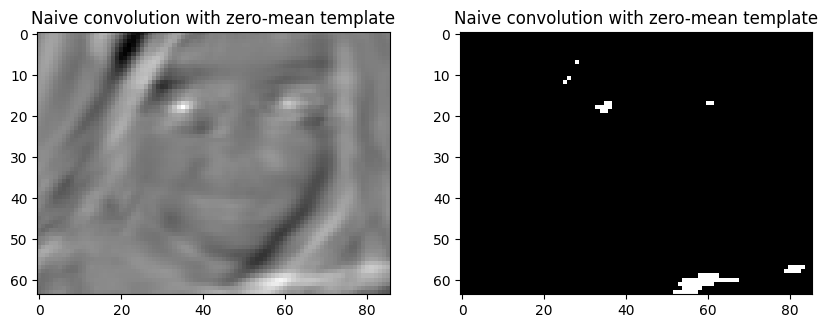

In [5]:
# Match filtering with zero-mean template
f = template
f = f - np.mean(f)
f = f[::-1,::-1] #Flip template so that convolution actually implements correlation
res = signal.convolve2d(im,f,mode='valid');
plt.figure(figsize=(10,10))
plt.subplot(121); plt.imshow(res, cmap = 'gray'); plt.title('Naive convolution with zero-mean template');
plt.subplot(122); plt.imshow(res > .5*np.max(res), cmap = 'gray'); plt.title('Naive convolution with zero-mean template');



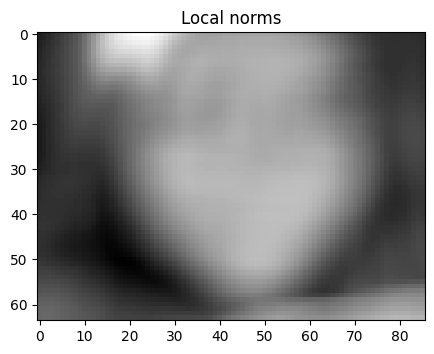

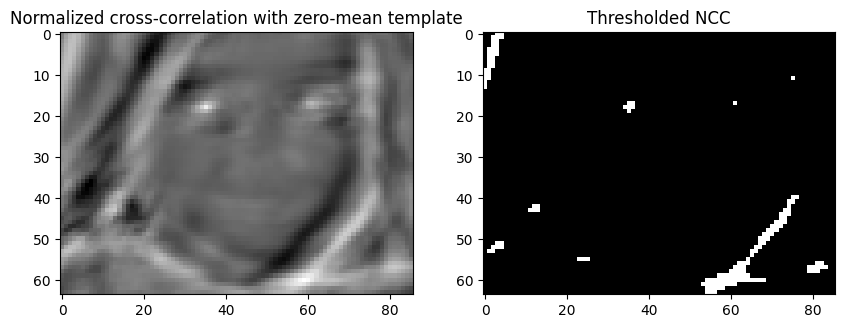

In [6]:
# Match filtering with normalized cross correlation
f = template
f = f - np.mean(f)
f = f / np.sum(f**2)**.5
f = f[::-1,::-1]

imnorm = signal.convolve2d(im**2,np.ones(f.shape),'valid')**.5
ncc    = signal.convolve2d(im,f,'valid') / imnorm

plt.figure(figsize=(5,5)); plt.imshow(imnorm,cmap = 'gray'); plt.title('Local norms');
plt.figure(figsize=(10,10))
plt.subplot(121); plt.imshow(ncc,cmap = 'gray'); plt.title('Normalized cross-correlation with zero-mean template');
plt.subplot(122); plt.imshow(ncc > .5*np.max(ncc),cmap='gray'); plt.title('Thresholded NCC');

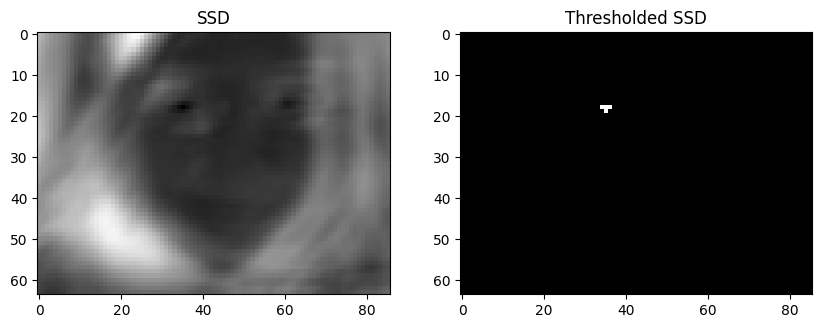

In [7]:
# SSD filtering
f = template
f = f[::-1,::-1]

fsqnorm  = np.sum(f**2)
imsqnorm = signal.convolve2d(im**2,np.ones(f.shape),'valid')
ssd = fsqnorm + imsqnorm - 2*signal.convolve2d(im,f,'valid')

plt.figure(figsize=(10,10))
plt.subplot(121); plt.imshow(ssd,cmap='gray'); plt.title('SSD');
plt.subplot(122); plt.imshow(ssd < .1*np.max(ssd),cmap='gray'); plt.title('Thresholded SSD');
